Zadanie 1  

In [346]:
class GaussianNumber:
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary

    def __str__(self):
        return f"{self.real} + {self.imaginary}i"

    def __add__(self, other):
        return GaussianNumber(self.real + other.real, self.imaginary + other.imaginary)

    def __sub__(self, other):
        return GaussianNumber(self.real - other.real, self.imaginary - other.imaginary)

    def __mul__(self, other):
        return GaussianNumber(self.real * other.real - self.imaginary * other.imaginary, self.real * other.imaginary + self.imaginary * other.real)

    def __eq__(self, other):
        return self.real == other.real and self.imaginary == other.imaginary

    def __ne__(self, other):
        return not self.__eq__(other)

    def __abs__(self):
        return self.real ** 2 + self.imaginary ** 2

    @staticmethod
    def divide_with_reminder(a, b):
        q = GaussianNumber((a.real * b.real + a.imaginary * b.imaginary) // abs(b), (a.imaginary * b.real - a.real * b.imaginary) // abs(b))
        r = a - q * b
        return q, r

    @staticmethod
    def gcd(a, b):
        if abs(a) < abs(b):
            a, b = b, a

        while abs(b) != 0:
            a, b = b, GaussianNumber.divide_with_reminder(a, b)[1]

        return a

    @staticmethod
    def lcm(a, b):
        return GaussianNumber.divide_with_reminder(a * b, GaussianNumber.gcd(a, b))[0]


In [347]:
x = GaussianNumber(3, 4)
y = GaussianNumber(1, 3)

print("(3 + 4i, 1 + 3i) = (gcd(3 + 4i, 1 + 3i)) = ", f"({GaussianNumber.gcd(x, y)})")
print("(3 + 4i) ∩ (1 + 3i) = (lcm(3 + 4i, 1 + 3i)) = ", f"({GaussianNumber.lcm(x, y)})")

(3 + 4i, 1 + 3i) = (gcd(3 + 4i, 1 + 3i)) =  (-1 + 2i)
(3 + 4i) ∩ (1 + 3i) = (lcm(3 + 4i, 1 + 3i)) =  (7 + 1i)


Zadanie 2

In [368]:
class Polynomial:
    def __init__(self, coefficients, remove_leading_zeros=True):
        self.coefficients = coefficients
        if remove_leading_zeros:
            self.remove_leading_zeros()

    def degree(self):
        f = Polynomial(list(self.coefficients))
        return len(f.coefficients) - 1
    
    def leading_term(self):
        f = Polynomial(list(self.coefficients))
        return f.coefficients[-1]

    def __str__(self):
        if len(self.coefficients) == 0:
            return "0"
        
        return " + ".join([f"{self.coefficients[i]}x^{i}" for i in range(len(self.coefficients))])

    def __add__(self, other):
        result = [0] * (max(self.degree(), other.degree()) + 1)

        for index, value in enumerate(self.coefficients):
            result[index] += value
        
        for index, value in enumerate(other.coefficients):
            result[index] += value

        self.remove_leading_zeros()

        return Polynomial(result)
    
    def __sub__(self, other):
        result = [0] * (max(self.degree(), other.degree()) + 1)

        for index, value in enumerate(self.coefficients):
            result[index] += value
        
        for index, value in enumerate(other.coefficients):
            result[index] -= value

        self.remove_leading_zeros()

        return Polynomial(result)
    
    def __mul__(self, other):
        result = [0] * (self.degree() + other.degree() + 1)

        for i in range(len(self.coefficients)):
            for j in range(len(other.coefficients)):
                result[i + j] += self.coefficients[i] * other.coefficients[j]

        self.remove_leading_zeros()

        return Polynomial(result)
    
    def __eq__(self, other):
        return self.coefficients == other.coefficients
    
    def __ne__(self, other):
        return not self.__eq__(other)
    
    def remove_leading_zeros(self):
        while len(self.coefficients) > 0 and self.coefficients[-1] == 0:
            self.coefficients.pop()

    def is_zero(self):
        for coefficient in self.coefficients:
            if coefficient != 0:
                return False
        return True
    
    @staticmethod
    def divide_with_reminder(a, b):    
        q = Polynomial([0] * (len(a.coefficients) - len(b.coefficients) + 1), False)
        r = Polynomial(list(a.coefficients))

        while r.degree() >= b.degree():
            index = r.degree() - b.degree()
            q.coefficients[index] = r.leading_term() / b.leading_term()
            for i in range(len(b.coefficients)):
                r.coefficients[i + index] -= q.coefficients[index] * b.coefficients[i]

        q.remove_leading_zeros()
        r.remove_leading_zeros()

        return q, r
    
    @staticmethod
    def gcd(a, b):
        if a.degree() < b.degree():
            a, b = b, a

        while len(b.coefficients) > 0:
            a, b = b, Polynomial.divide_with_reminder(a, b)[1]
        
        return a
    
    @staticmethod
    def lcm(a, b):
        return Polynomial.divide_with_reminder(a * b, Polynomial.gcd(a, b))[0]
    
    @staticmethod
    def diophantine(a, b):
        if b.is_zero():
            return Polynomial([1]), Polynomial([0])
        
        q, r = Polynomial.divide_with_reminder(a, b)
        s, t = Polynomial.diophantine(b, r)

        t.remove_leading_zeros()
        u = s - q * t
        u.remove_leading_zeros()

        return t, u


In [349]:
f = Polynomial([1, 0, 1]) # x^2 + 1
g = Polynomial([1, 2, 1]) # x^2 + 2x + 1

q, r = Polynomial.divide_with_reminder(f, g)

print("(f, g) = (gcd(x^2 + 1, x^2 + 2x + 1)) = ", f"({Polynomial.gcd(f, g)})")
print("(f) ∩ (g) = (lcm(x^2 + 1, x^2 + 2x + 1)) = ", f"({Polynomial.lcm(f, g)})")

(f, g) = (gcd(x^2 + 1, x^2 + 2x + 1)) =  (1.0x^0)
(f) ∩ (g) = (lcm(x^2 + 1, x^2 + 2x + 1)) =  (1.0x^0 + 2.0x^1 + 2.0x^2 + 2.0x^3 + 1.0x^4)


Zadanie 3

In [350]:
import numpy as np
import matplotlib.pyplot as plt

In [351]:
def draw_variety(datas, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for data in datas:
        ax.plot_surface(data[0], data[1], data[2], cmap='inferno')
    ax.set_title(title)

def draw_variaty(funcs, title):
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)

    X, Y = np.meshgrid(x, y)

    datas = []
    for func in funcs:
        Z = func(X, Y)
        datas.append([X, Y, Z])

    draw_variety(datas, title)
    plt.show()

def draw_variety_from_conditions(conditions, title):
    funcs = []
    for condition in conditions:
        funcs.append(lambda x, y: eval(condition))

    draw_variaty(funcs, title)

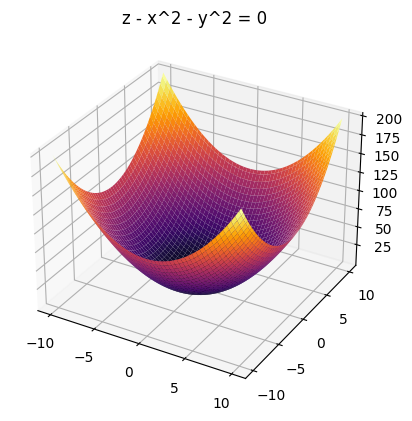

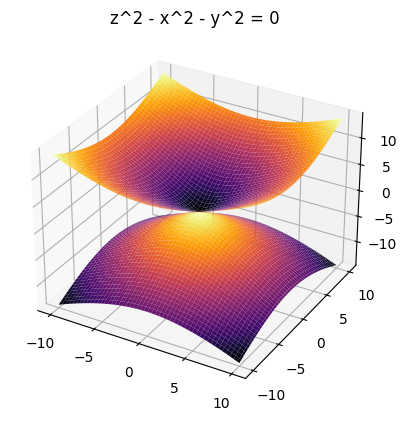

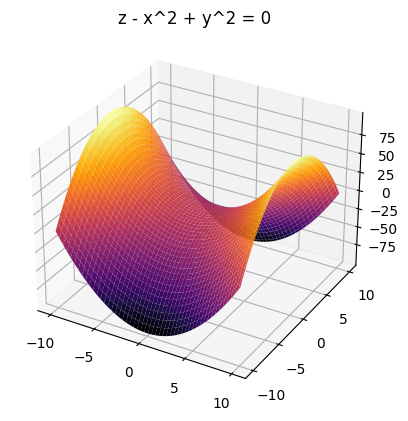

In [352]:
draw_variaty([lambda x, y: x**2 + y**2], "z - x^2 - y^2 = 0")
draw_variaty([lambda x, y: np.sqrt(x**2 + y**2), lambda x, y: -np.sqrt(x**2 + y**2)], "z^2 - x^2 - y^2 = 0")
draw_variaty([lambda x, y: x**2 - y**2], "z - x^2 + y^2 = 0")

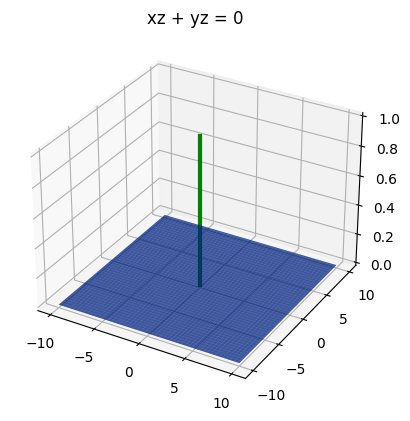

In [353]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

z_condition_1 = np.zeros_like(x)
z_condition_2 = (x == 0) & (y == 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(x, y, z_condition_1, alpha=0.5, color='green')
surf2 = ax.plot_surface(x, y, z_condition_2, alpha=0.5, color='blue')

ax.plot([0, 0], [0, 0], [0, 1], color='g', linewidth=3, label='x = 0 and y = 0')
plt.title("xz + yz = 0")

plt.show()

Zadanie 4

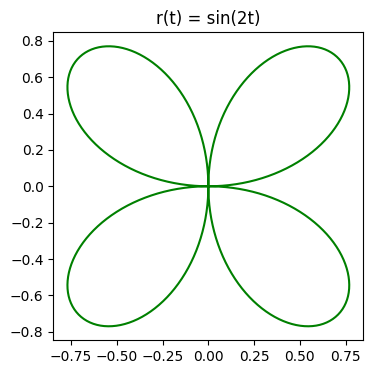

In [354]:
theta = np.linspace(0, 2*np.pi, 1000)

r = np.sin(2 * theta)

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(4, 4))
plt.plot(x, y, color='green')
plt.title("r(t) = sin(2t)")
plt.show()

Zadanie 4 - konwersja ze współrzędnych biegunowych na kartezjańskie

$r(t) = sin(2t) = 2sin(t)cos(t)$

$r(t)^3 = 2(rsin(t))(rcos(t))$

$rcos(t) = x$

$rsin(t) = y$

$r(t) = sqrt(x^2 + y^2)$

$\texttt{zatem } r^3 = 2xy \texttt{ oraz } r = sqrt(x^2 + y^2)$

$(x^2 + y^2)^{3/2} = 2xy$

$(x^2 + y^2)^3 = 4x^2y^2$

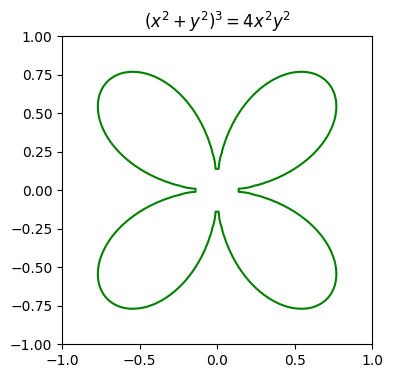

In [355]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2)**3 - 4*X**2*Y**2

plt.figure(figsize=(4, 4))
plt.contour(X, Y, Z, levels=[0], colors='green')
plt.title('$(x^2 + y^2)^3 = 4x^2y^2$')
plt.show()

Zadanie 5

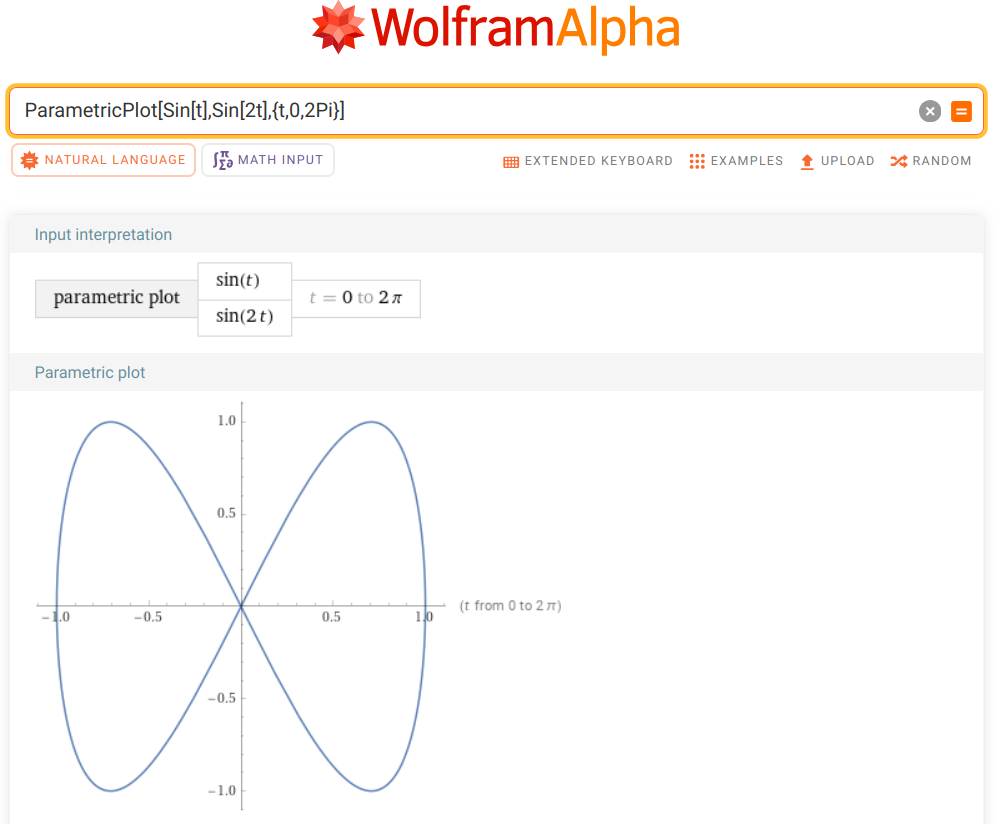

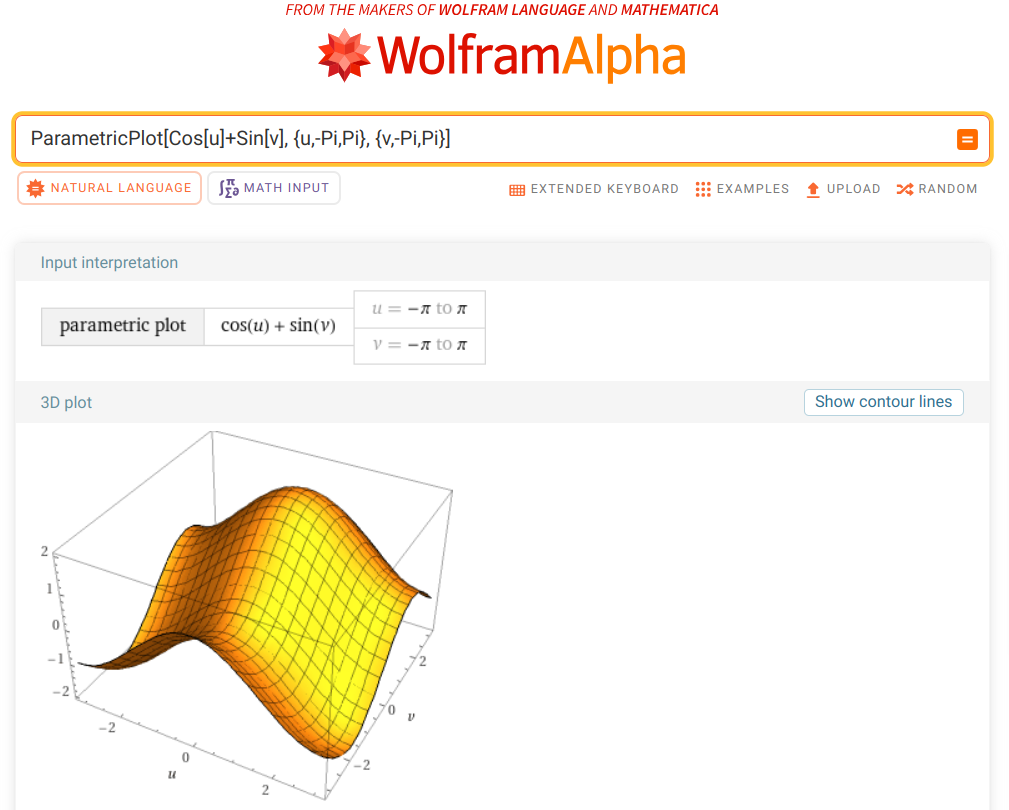

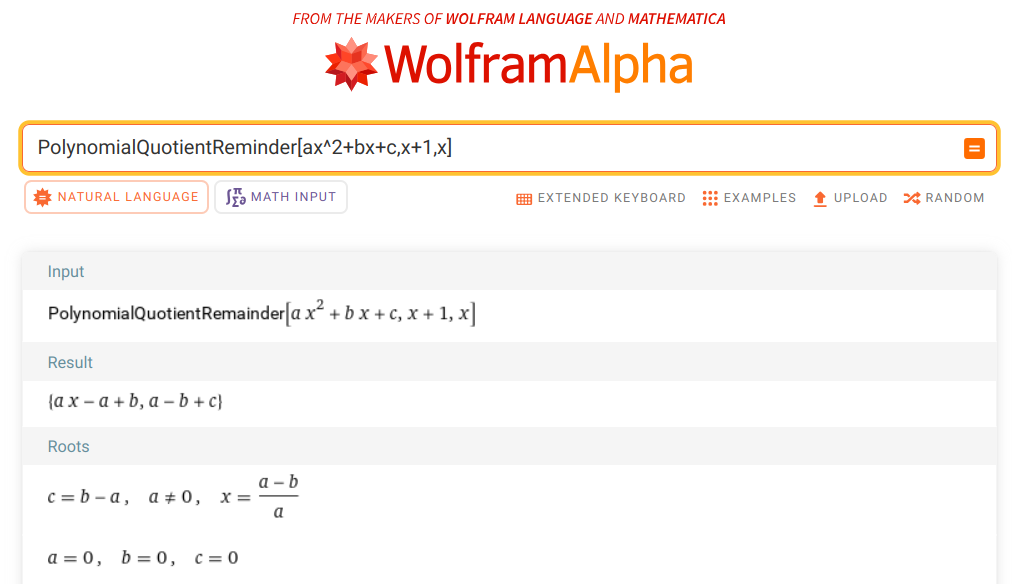

Zadanie 6

In [361]:
def lt(a, b):
    for i in range(len(a)):
        if a[i] < b[i]:
            return False
    return True

def minimalElements(A):
    minimal_elements = []
    for a in A:
        found = False

        for m in minimal_elements:
            if lt(m, a):
                minimal_elements.remove(m)
            elif lt(a, m):
                found = True
                break

        if not found:
            minimal_elements.append(a)
    
    return minimal_elements

def draw(all_elements, minimal_elements):
    plt.figure(figsize=(4, 4))

    for a in all_elements:
        plt.scatter(a[0], a[1], color='blue')

    for m in minimal_elements:
        plt.scatter(m[0], m[1], color='red')

    plt.show()

Minimals elements of set A = { (n, k) | n, k ∈ [0, 100) and n * k >= 11 } are:
[(2, 6), (3, 4), (4, 3), (6, 2)]


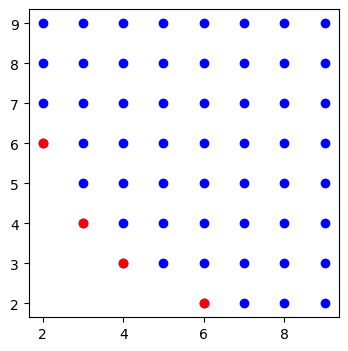

Minimals elements of set B = { (n, k) | n, k ∈ [0, 100) and (n - 10)^2 + (k - 10)^2 <= 25 } are:
[(5, 10), (6, 7), (7, 6), (10, 5)]


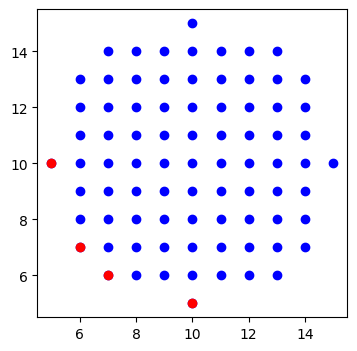

In [364]:
grid1 = [(n, k) for n in range(0, 10) for k in range(0, 10) if n * k >= 11]
print("Minimals elements of set A = { (n, k) | n, k ∈ [0, 100) and n * k >= 11 } are:")
print(minimalElements(grid1))
draw(grid1, minimalElements(grid1))

grid2 = [(n, k) for n in range(0, 100) for k in range(0, 100) if (n - 10)**2 + (k - 10)**2 <= 25]
print("Minimals elements of set B = { (n, k) | n, k ∈ [0, 100) and (n - 10)^2 + (k - 10)^2 <= 25 } are:")
print(minimalElements(grid2))
draw(grid2, minimalElements(grid2))

Zadanie 8

In [372]:
f = Polynomial([1, 1, 1]) # 1 + x + x^2
g = Polynomial([1, 1])    # 1 + x
A, B = Polynomial.diophantine(f, g)

print("Af + Bg = gcd(f,g)")
print(f"({A})*({f}) + ({B})*({g}) = {Polynomial.gcd(f, g)}")

Af + Bg = gcd(f,g)
(1x^0)*(1x^0 + 1x^1 + 1x^2) + (0x^0 + -1.0x^1)*(1x^0 + 1x^1) = 1x^0
